In [1]:
import pandas as pd
import numpy as np

In [2]:
df_movies=pd.read_csv("E:/MASTERS IN COLUMBIA/Fall 2019/Personalization theory/project 1/ml-20m/movies.csv",usecols=['movieId', 'title'],
    dtype={'movieId': 'int32', 'title': 'str'})
df_movies

,movieId,title
0,1,Toy Story (1995)
1,2,Jumanji (1995)
2,3,Grumpier Old Men (1995)
3,4,Waiting to Exhale (1995)
4,5,Father of the Bride Part II (1995)
5,6,Heat (1995)
6,7,Sabrina (1995)
7,8,Tom and Huck (1995)
8,9,Sudden Death (1995)
9,10,GoldenEye (1995)


In [3]:
df_ratings=pd.read_csv("E:/MASTERS IN COLUMBIA/Fall 2019/Personalization theory/project 1/ml-20m/ratings.csv",usecols=['userId', 'movieId', 'rating'],
    dtype={'userId': 'int32', 'movieId': 'int32', 'rating': 'float64'})
df_ratings

,userId,movieId,rating
0,1,2,3.5
1,1,29,3.5
2,1,32,3.5
3,1,47,3.5
4,1,50,3.5
5,1,112,3.5
6,1,151,4.0
7,1,223,4.0
8,1,253,4.0
9,1,260,4.0


In [4]:
df=pd.merge(df_ratings,df_movies,on="movieId")
df.head(n=20)

,userId,movieId,rating,title
0,1,2,3.5,Jumanji (1995)
1,5,2,3.0,Jumanji (1995)
2,13,2,3.0,Jumanji (1995)
3,29,2,3.0,Jumanji (1995)
4,34,2,3.0,Jumanji (1995)
5,54,2,3.0,Jumanji (1995)
6,88,2,1.0,Jumanji (1995)
7,91,2,3.5,Jumanji (1995)
8,116,2,2.0,Jumanji (1995)
9,119,2,4.0,Jumanji (1995)


In [33]:
df.count()

userId     20000263
movieId    20000263
rating     20000263
title      20000263
dtype: int64

In [34]:
num_users = len(df_ratings.userId.unique())
num_items = len(df_ratings.movieId.unique())
print('There are {} unique users and {} unique movies in this data set'.format(num_users, num_items))

There are 138493 unique users and 26744 unique movies in this data set


In [35]:
# get count
df_ratings_cnt_tmp = pd.DataFrame(df_ratings.groupby('rating').size(), columns=['count'])
df_ratings_cnt_tmp

,count
rating,
0.5,239125
1.0,680732
1.5,279252
2.0,1430997
2.5,883398
3.0,4291193
3.5,2200156
4.0,5561926
4.5,1534824


In [36]:
df_movies_cnt = pd.DataFrame(df_ratings.groupby('movieId').size(), columns=['count'])
df_movies_cnt.head()


,count
movieId,
1,49695
2,22243
3,12735
4,2756
5,12161


In [37]:
#now we need to take only movies that have been rated atleast 1000 times to get some idea of the reactions of users towards it

popularity_thres = 1000
popular_movies = list(set(df_movies_cnt.query('count >= @popularity_thres').index))
df_ratings_drop_movies = df_ratings[df_ratings.movieId.isin(popular_movies)]
print('shape of original ratings data: ', df_ratings.shape)
print('shape of ratings data after dropping unpopular movies: ', df_ratings_drop_movies.shape)

shape of original ratings data:  (20000263, 3)
shape of ratings data after dropping unpopular movies:  (17765516, 3)


In [41]:
df_users_cnt = pd.DataFrame(df_ratings_drop_movies.groupby('userId').size(), columns=['count'])
df_users_cnt.head()

,count
userId,
1,159
2,54
3,184
4,28
5,66


In [45]:
df_users_cnt.sort_values(by='count',ascending=False)

,count
userId,
8405,2965
118205,2807
74142,2579
34576,2478
125794,2460
82418,2418
71975,2415
59477,2333
83090,2328


In [49]:
# filter data to come to an approximation of user likings.
ratings_thres = 1000
active_users = list(set(df_users_cnt.query('count >= @ratings_thres').index))
df_ratings_drop_users = df_ratings_drop_movies[df_ratings_drop_movies.userId.isin(active_users)]
print('shape of original ratings data: ', df_ratings.shape)
print('shape of ratings data after dropping both unpopular movies and inactive users: ', df_ratings_drop_users.shape)

shape of original ratings data:  (20000263, 3)
shape of ratings data after dropping both unpopular movies and inactive users:  (1205777, 3)


In [53]:
df_moviecount=df_ratings_drop_users['movieId'].value_counts().rename_axis('movieId').reset_index(name='counts')
top100=df_moviecount[0:100]
top100.head()
sample=pd.merge(top100,df_ratings_drop_users,on='movieId')
sample.count()

movieId    88008
counts     88008
userId     88008
rating     88008
dtype: int64

In [54]:
sample.head()

,movieId,counts,userId,rating
0,2571,935,156,5.0
1,2571,935,586,4.5
2,2571,935,741,4.5
3,2571,935,768,4.0
4,2571,935,775,4.5


In [55]:
sample=sample[['movieId','userId','rating']]

In [56]:
sample.head()

,movieId,userId,rating
0,2571,156,5.0
1,2571,586,4.5
2,2571,741,4.5
3,2571,768,4.0
4,2571,775,4.5


In [63]:
from surprise import Reader
from surprise import Dataset
from surprise.model_selection import cross_validate
from surprise import NormalPredictor
from surprise import KNNBasic
from surprise import KNNWithMeans
from surprise import KNNWithZScore
from surprise import KNNBaseline
from surprise.accuracy import rmse
from surprise import accuracy
from surprise.model_selection import train_test_split

In [64]:
reader = Reader(rating_scale=(0, 5))
data = Dataset.load_from_df(sample[['userId', 'movieId', 'rating']], reader)

In [65]:
benchmark = []
# Iterate over all algorithms
for algorithm in [KNNBaseline(), KNNBasic(), KNNWithMeans(), KNNWithZScore()]:
    # Perform cross validation
    results = cross_validate(algorithm, data, measures=['RMSE'], cv=3, verbose=False)
    
    # Get results & append algorithm name
    tmp = pd.DataFrame.from_dict(results).mean(axis=0)
    tmp = tmp.append(pd.Series([str(algorithm).split(' ')[0].split('.')[-1]], index=['Algorithm']))
    benchmark.append(tmp)

Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.


In [77]:
surprise_results = pd.DataFrame(benchmark).set_index('Algorithm').sort_values('test_rmse')
surprise_results

,test_rmse,fit_time,test_time
Algorithm,,,
KNNBaseline,0.758401,2.260068,15.409228
KNNWithMeans,0.758758,2.045824,15.577242
KNNWithZScore,0.762576,2.206710,16.191338
KNNBasic,0.771192,2.012057,486.657619


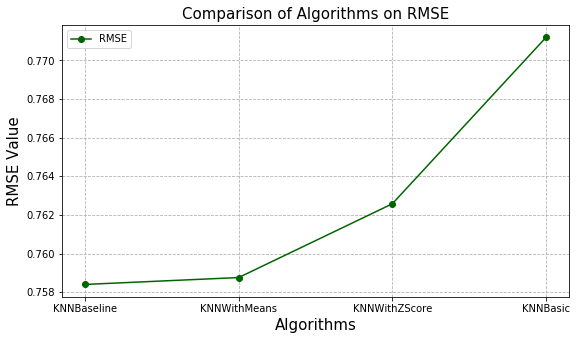

In [81]:
import matplotlib.pyplot as plt
%matplotlib inline
x_algo = ['KNN Basic', 'KNN Means', 'KNN ZScore', 'KNN Baseline']
plt.figure(figsize=(20,5))
plt.subplot(1, 2, 1)
plt.title('Comparison of Algorithms on RMSE', loc='center', fontsize=15)
plt.plot(surprise_results.index, surprise_results['test_rmse'], label='RMSE', color='darkgreen', marker='o')
plt.xlabel('Algorithms', fontsize=15)
plt.ylabel('RMSE Value', fontsize=15)
plt.legend()
plt.grid(ls='dashed')

In [96]:
from surprise.model_selection import GridSearchCV


sim_options = {
    "name": ["msd", "cosine"],
    "user_based": [False,True],
}

param_grid = {'k': range(1,50,3),"sim_options": sim_options}

knnbaseline_gs = GridSearchCV(KNNBaseline, param_grid, measures=['rmse', 'mae'], cv=3)
knnbaseline_gs.fit(data)

Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the cosine sim

Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the m

Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Estimating biases usi

In [121]:
pd.DataFrame.from_dict(knnbaseline_gs.cv_results)

,split0_test_rmse,split1_test_rmse,split2_test_rmse,mean_test_rmse,std_test_rmse,rank_test_rmse,split0_test_mae,split1_test_mae,split2_test_mae,mean_test_mae,std_test_mae,rank_test_mae,mean_fit_time,std_fit_time,mean_test_time,std_test_time,params,param_k,param_sim_options
0,0.939656,0.954497,0.954304,0.949486,0.006951,68,0.686424,0.694858,0.693275,0.691519,0.003660,67,0.305546,0.002000,2.044367,0.530212,"{'k': 1, 'sim_options': {'name': 'msd', 'user_...",1,"{'name': 'msd', 'user_based': False}"
1,0.901124,0.914888,0.913744,0.909919,0.006236,65,0.675128,0.686239,0.686528,0.682632,0.005307,65,2.260094,0.094682,10.349235,0.273497,"{'k': 1, 'sim_options': {'name': 'msd', 'user_...",1,"{'name': 'msd', 'user_based': True}"
2,0.932096,0.934855,0.937084,0.934679,0.002040,67,0.691650,0.692685,0.693542,0.692625,0.000774,68,0.529568,0.003740,1.731107,0.414660,"{'k': 1, 'sim_options': {'name': 'cosine', 'us...",1,"{'name': 'cosine', 'user_based': False}"
3,0.895682,0.920352,0.917395,0.911143,0.010999,66,0.677153,0.695123,0.695603,0.689293,0.008586,66,4.830536,0.026280,9.936711,0.459818,"{'k': 1, 'sim_options': {'name': 'cosine', 'us...",1,"{'name': 'cosine', 'user_based': True}"
4,0.773587,0.790448,0.783368,0.782468,0.006913,61,0.582558,0.593091,0.588913,0.588187,0.004331,55,0.284643,0.001876,2.257295,0.393213,"{'k': 4, 'sim_options': {'name': 'msd', 'user_...",4,"{'name': 'msd', 'user_based': False}"
5,0.783211,0.796694,0.788892,0.789599,0.005527,63,0.597604,0.607665,0.600960,0.602076,0.004183,63,2.208444,0.147588,10.994431,0.483887,"{'k': 4, 'sim_options': {'name': 'msd', 'user_...",4,"{'name': 'msd', 'user_based': True}"
6,0.778352,0.793173,0.786505,0.786010,0.006061,62,0.588822,0.598891,0.592705,0.593473,0.004146,62,0.553949,0.040003,2.453826,0.352799,"{'k': 4, 'sim_options': {'name': 'cosine', 'us...",4,"{'name': 'cosine', 'user_based': False}"
7,0.782626,0.801127,0.793919,0.792557,0.007614,64,0.595920,0.609831,0.606108,0.603953,0.005880,64,5.748971,0.112932,12.480470,1.053665,"{'k': 4, 'sim_options': {'name': 'cosine', 'us...",4,"{'name': 'cosine', 'user_based': True}"
8,0.754072,0.767749,0.759642,0.760488,0.005616,31,0.569301,0.579064,0.573518,0.573961,0.003998,5,0.334075,0.010907,3.673052,0.586238,"{'k': 7, 'sim_options': {'name': 'msd', 'user_...",7,"{'name': 'msd', 'user_based': False}"
9,0.765452,0.778745,0.771020,0.771739,0.005450,56,0.584357,0.594284,0.588791,0.589144,0.004060,57,2.202789,0.105106,12.422925,1.024406,"{'k': 7, 'sim_options': {'name': 'msd', 'user_...",7,"{'name': 'msd', 'user_based': True}"


In [114]:
print(knnbaseline_gs.best_score["rmse"])
print(knnbaseline_gs.best_params["rmse"])

0.7530721430222526
{'k': 16, 'sim_options': {'name': 'msd', 'user_based': False}}


In [115]:
print(knnbaseline_gs.best_score["mae"])
print(knnbaseline_gs.best_params["mae"])

0.5710922738062202
{'k': 13, 'sim_options': {'name': 'msd', 'user_based': False}}


In [141]:
#not able to plot as many values for a single k value
x=np.array(range(1,50,3))
y1 = knnbaseline_gs.cv_results['mean_test_rmse']
y2 = knnbaseline_gs.cv_results['mean_test_mae']
plt.figure(figsize=(18,5))

plt.subplot(1, 2, 1)
plt.title('K Neighbors vs RMSE', loc='center', fontsize=15)
plt.plot(x, y1, label='KNNBaseline', color='lightcoral', marker='o')
plt.xlabel('K Neighbor', fontsize=15)
plt.ylabel('RMSE Value', fontsize=15)
plt.legend()
plt.grid(ls='dotted')

plt.subplot(1, 2, 2)
plt.title('K Neighbors vs MAE', loc='center', fontsize=15)
plt.plot(x, y2, label='KNNBaseline', color='lightcoral', marker='o')
plt.xlabel('K Neighbor', fontsize=15)
plt.ylabel('MAE Value', fontsize=15)
plt.legend()
plt.grid(ls='dotted')

AttributeError: 'KNNBaseline' object has no attribute 'cv_results'

In [144]:
df_eval=pd.DataFrame()
a=0
test=[0.2,0.25,0.3,0.4]
sim_options = {'name': 'msd', 'user_based': False,'k':16}
for i in test:
    trainset, testset = train_test_split(data, test_size=i)
    algo = KNNBaseline(sim_options=sim_options)
    # Train the algorithm on the trainset, and predict ratings for the testset
    algo.fit(trainset)
    predictions = algo.test(testset)
    # Then compute RMSE
    df_eval.loc[a,'testsize']=i
    df_eval.loc[a,'rmse value']=accuracy.rmse(predictions)
    df_eval.loc[a,'mae value']=accuracy.mae(predictions)
    a=a+1


Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.7627
MAE:  0.5796
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.7602
MAE:  0.5778
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.7583
MAE:  0.5792
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.7713
MAE:  0.5881


In [147]:
df_eval.sort_values(by='rmse value')

,testsize,rmse value,mae value
2,0.30,0.758318,0.579154
1,0.25,0.760204,0.577760
0,0.20,0.762692,0.579646
3,0.40,0.771288,0.588078


In [170]:
def read_item_names():
    df_movies_new = df_movies
    rid_to_name = {}
    name_to_rid = {}
    for ind in df_movies_new.index:
        rid_to_name[df_movies_new['movieId'][ind]] = df_movies_new['title'][ind]
        name_to_rid[df_movies_new['title'][ind]] = (df_movies_new['movieId'][ind])
    return rid_to_name, name_to_rid

In [178]:
def make_recommendations(input_movie):
#using best parameters
    sim_options = {'name': 'msd', 'user_based': False,'k':16}
    algo = KNNBaseline(sim_options=sim_options)
    trainset, testset = train_test_split(data, test_size=0.3)
    algo.fit(trainset)

    # Read the mappings raw id <-> movie name
    rid_to_name, name_to_rid = read_item_names()


    #input_raw_id = name_to_rid[input_movie]
    input_raw_id = fuzzy_matching(name_to_rid, input_movie, verbose=True)
    input_inner_id = algo.trainset.to_inner_iid(input_raw_id)

    # Retrieve inner ids of the nearest neighbors of Toy Story.
    input_neighbors = algo.get_neighbors(input_inner_id, k=10)

    # Convert inner ids of the neighbors into names.
    input_neighbors = (algo.trainset.to_raw_iid(inner_id)
                           for inner_id in input_neighbors)
    input_neighbors = (rid_to_name[rid]
                           for rid in input_neighbors)

    print()
    print('The 10 nearest neighbors of ',input_movie,' are:')
    for movie in input_neighbors:
        print(movie)

In [175]:
from fuzzywuzzy import fuzz


# In[24]:


def fuzzy_matching(mapper, fav_movie, verbose=True):
    """
    return the closest match via fuzzy ratio. 
    
    Parameters
    ----------    
    mapper: dict, map movie title name to index of the movie in data
    fav_movie: str, name of user input movie
    
    verbose: bool, print log if True
    Return
    ------
    index of the closest match
    """
    match_tuple = []
    # get match
    for title, idx in mapper.items():
        ratio = fuzz.ratio(title.lower(), fav_movie.lower())
        if ratio >= 60:
            match_tuple.append((title, idx, ratio))
    # sort
    match_tuple = sorted(match_tuple, key=lambda x: x[2])[::-1]
    if not match_tuple:
        print('Oops! No match is found')
        return
    if verbose:
        print('Found possible matches in our database: {0}\n'.format([x[0] for x in match_tuple]))
    return match_tuple[0][1]

In [184]:
make_recommendations('toy story')

Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Found possible matches in our database: ['Toy Story (1995)', 'Toy Story 3 (2010)', 'Toy Story 2 (1999)']


The 10 nearest neighbors of  toy story  are:
Back to the Future (1985)
Apollo 13 (1995)
Stand by Me (1986)
Raiders of the Lost Ark (Indiana Jones and the Raiders of the Lost Ark) (1981)
Ghostbusters (a.k.a. Ghost Busters) (1984)
Wizard of Oz, The (1939)
Fugitive, The (1993)
Indiana Jones and the Last Crusade (1989)
Shrek (2001)
Saving Private Ryan (1998)
